<a href="https://colab.research.google.com/github/dheerajreddy3108/Airplane-Detection-using-R-CNN/blob/main/R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive/airplanes')
os.getcwd()


'/content/gdrive/My Drive/airplanes'

In [3]:
path = '/content/gdrive/My Drive/airplanes/'
files = os.listdir(path)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import keras
from keras import Model
from keras import optimizers
from keras.layers import Dense
import glob
from random import randint


In [5]:
img_path = '/content/gdrive/My Drive/airplanes/Images/Images'
annotations_path = '/content/gdrive/My Drive/airplanes/Airplanes_Annotations/Airplanes_Annotations'


#data visualization


In [6]:
def data_viz(rand_num):
    img_name = 'airplane_'+str(rand_num) +'.jpg'
    img = cv2.imread(os.path.join(img_path,img_name))
    data_frame = pd.read_csv(os.path.join(annotations_path,img_name.replace('.jpg','.csv')))
    plt.imshow(img)

    for r in data_frame.iterrows():
        p1 = r[1][0].split(' ')[0]
        q1 = r[1][0].split(' ')[1]
        p2 = r[1][0].split(' ')[2]
        q2 = r[1][0].split(' ')[3]

        p1 = int(p1)
        q1 = int(q1)
        p2 = int(p2)
        q2 = int(q2)

        img_bb = cv2.rectangle(img,(p1,q1),(p2,q2),(255,255,255),2)
        plt.figure()
        plt.imshow(img_bb)

    return img_bb


Random_Image

<ipython-input-6-5d7b39df16eb>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p1 = r[1][0].split(' ')[0]
<ipython-input-6-5d7b39df16eb>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q1 = r[1][0].split(' ')[1]
<ipython-input-6-5d7b39df16eb>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p2 = r[1][0].split(' ')[2]
<ipython-input-6-5d7b39df16eb>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In 

array([[[166, 160, 147],
        [165, 159, 146],
        [164, 158, 145],
        ...,
        [ 93,  82,  68],
        [133, 120, 104],
        [208, 193, 177]],

       [[167, 161, 148],
        [168, 162, 149],
        [170, 164, 151],
        ...,
        [138, 127, 113],
        [175, 162, 146],
        [249, 234, 218]],

       [[171, 165, 152],
        [173, 167, 154],
        [177, 171, 158],
        ...,
        [191, 180, 166],
        [237, 224, 210],
        [255, 242, 228]],

       ...,

       [[185, 185, 173],
        [178, 178, 166],
        [166, 168, 156],
        ...,
        [147, 150, 141],
        [148, 151, 142],
        [149, 152, 143]],

       [[175, 175, 163],
        [169, 169, 157],
        [160, 162, 150],
        ...,
        [146, 149, 140],
        [146, 149, 140],
        [147, 150, 141]],

       [[160, 160, 148],
        [160, 160, 148],
        [160, 162, 150],
        ...,
        [147, 150, 141],
        [146, 149, 140],
        [146, 149, 140]]], dtype=uint8)
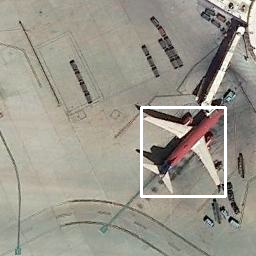

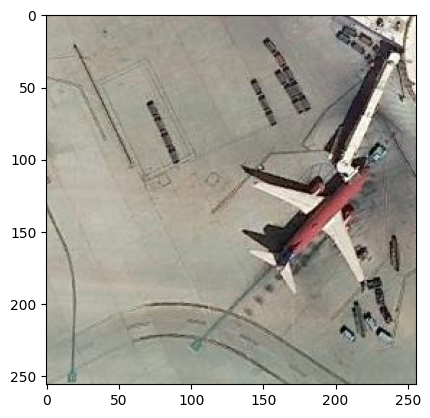

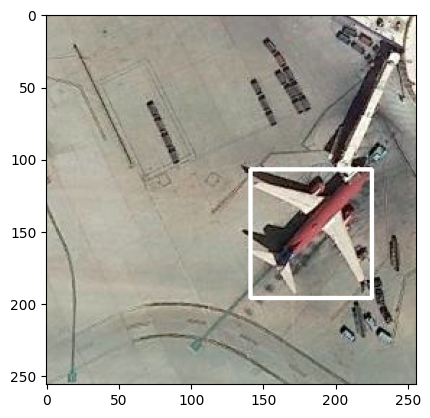

In [7]:
rand_num = randint(1,700)
data_viz(rand_num)


In [8]:

cv2.setUseOptimized(True);
sel_search_seg = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
img1 = cv2.imread(os.path.join(img_path,'42845.jpg'))
sel_search_seg.setBaseImage(img1)
sel_search_seg.switchToSelectiveSearchFast()
rects = sel_search_seg.process()
img_output= img1.copy()
img_out = img1.copy()


0 34 256 166
152 217 62 39
13 167 24 37
0 44 34 61
144 202 95 54
133 145 75 81
27 63 145 116
208 231 33 25
138 231 48 25
0 0 256 193
0 143 139 113
152 216 62 40
117 186 101 70
133 169 29 22
164 161 43 46
232 57 24 20
138 153 118 103
78 127 29 42
137 231 34 25
16 225 48 31
181 171 70 80
0 86 100 70
13 153 25 47
0 0 256 194
28 219 64 37
207 215 49 41
217 8 21 13
175 83 17 13
55 181 58 25
129 202 110 54
159 48 18 13
135 231 36 25
179 162 77 69
15 105 40 29
0 0 256 256
221 83 35 27
18 153 43 24
20 90 10 27
48 111 10 22
84 198 28 39
115 148 17 15
15 105 113 63
0 104 135 103
153 217 61 39
82 208 14 34
0 106 153 150
143 73 23 23
79 125 28 44
154 0 55 26
197 40 17 21
37 0 160 134
79 146 28 21
105 145 76 52
222 83 34 26
20 153 236 103
112 152 19 15
145 152 38 45
159 235 27 21
0 34 76 82
0 196 29 34
10 75 31 42
0 43 152 213
184 166 23 26
0 90 86 66
141 204 98 52
78 147 29 20
217 5 25 15
81 195 19 47
176 152 18 21
22 156 44 40
216 236 25 20
15 67 40 67
46 121 82 47
184 170 20 22
242 197 14 42
0 4

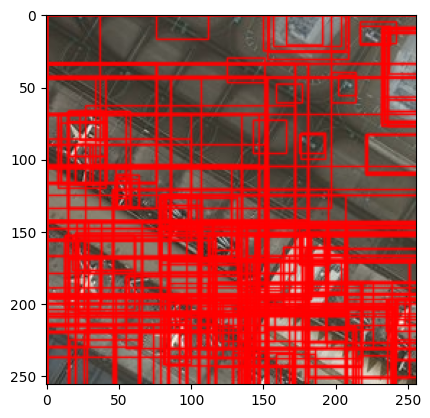

In [9]:

for i,rect in enumerate((rects)):
    x,y,w,h = rect
    print(x,y,w,h)

    cv2.rectangle(img_out,(x,y),(x+w,y+h),(255,0,0),1,cv2.LINE_AA)

plt.imshow(img_out)


In [10]:
X_train = []
y_train = []


In [11]:
def IOU(bb1,bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    x_right = min(bb1['x1'],bb2['x2'])
    y_bottom = min(bb1['y2'],bb2['y2'])
    y_top = max(bb1['y1'],bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.

    intersect_area = (x_right - x_left)*(y_bottom - y_top)
    bb1_area =  (bb1['x2']- bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area =  (bb2['x2']- bb2['x1']) * (bb2['y2'] - bb2['y1'])

    IOU = intersect_area/float(bb1_area + bb2_area - intersect_area)
    assert IOU >=0.
    assert IOU <=1.

    return IOU

In [12]:
for e,name in enumerate(os.listdir(annotations_path)):
    if name.startswith('airplane'):
        file_name = name.split('.')[0]+'.jpg'
        print(e,file_name)
        img = cv2.imread(os.path.join(img_path,file_name))
        dataframe = pd.read_csv(os.path.join(annotations_path,name))
        getvalues = []
        for r in dataframe.iterrows():
            x1 = r[1][0].split(' ')[0]
            y1 = r[1][0].split(' ')[1]
            x2 = r[1][0].split(' ')[2]
            y2 = r[1][0].split(' ')[3]

            x1 = int(x1)
            y1 = int(y1)
            x2 = int(x2)
            y2 = int(y2)

            getvalues.append({'x1':x1,'x2':x2,'y1':y1,'y2':y2})

        sel_search_seg.setBaseImage(img)
        sel_search_seg.switchToSelectiveSearchFast()
        sel_search_seg_res = sel_search_seg.process()

        img_out = img.copy()
        count = 0
        false_count = 0
        flag = 0
        fflag = 0
        bflag = 0


0 airplane_014.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

3 airplane_033.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

6 airplane_028.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

9 airplane_052.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

10 airplane_026.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

11 airplane_063.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

12 airplane_041.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

13 airplane_036.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

14 airplane_007.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

15 airplane_039.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

16 airplane_030.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

17 airplane_010.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

18 airplane_045.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

19 airplane_022.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

22 airplane_054.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

23 airplane_021.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

25 airplane_034.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

26 airplane_040.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

27 airplane_046.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

30 airplane_053.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

31 airplane_027.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

33 airplane_016.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

34 airplane_017.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

35 airplane_059.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

36 airplane_004.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

37 airplane_012.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

39 airplane_042.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

40 airplane_009.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

42 airplane_011.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

43 airplane_038.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

44 airplane_029.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

45 airplane_051.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

47 airplane_025.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

48 airplane_013.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

49 airplane_060.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

51 airplane_006.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

52 airplane_023.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

53 airplane_062.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

54 airplane_024.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

55 airplane_050.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

56 airplane_047.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

57 airplane_043.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

58 airplane_044.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

61 airplane_057.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

62 airplane_020.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

63 airplane_056.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

65 airplane_055.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

67 airplane_048.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

68 airplane_019.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

70 airplane_061.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

73 airplane_037.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

75 airplane_001.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

76 airplane_003.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

77 airplane_018.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

78 airplane_032.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

79 airplane_008.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

81 airplane_058.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

82 airplane_002.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

84 airplane_005.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

85 airplane_015.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

86 airplane_049.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

88 airplane_035.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

90 airplane_031.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

91 airplane_304.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

92 airplane_248.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

93 airplane_193.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

94 airplane_647.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

95 airplane_121.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

96 airplane_583.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

97 airplane_620.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

98 airplane_149.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

99 airplane_501.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

100 airplane_319.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

101 airplane_280.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

102 airplane_188.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

103 airplane_658.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

104 airplane_369.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

105 airplane_177.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

106 airplane_561.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

107 airplane_427.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

108 airplane_344.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

109 airplane_303.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

110 airplane_105.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

111 airplane_487.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

112 airplane_170.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

113 airplane_500.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

114 airplane_356.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

115 airplane_179.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

116 airplane_080.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

117 airplane_628.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

118 airplane_155.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

119 airplane_269.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

120 airplane_355.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

121 airplane_379.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

122 airplane_210.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

123 airplane_570.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

124 airplane_279.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

125 airplane_083.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

126 airplane_331.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

127 airplane_340.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

128 airplane_694.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

129 airplane_138.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

130 airplane_655.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

131 airplane_489.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

132 airplane_509.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

133 airplane_618.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

134 airplane_446.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

135 airplane_405.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

136 airplane_543.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

137 airplane_351.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

138 airplane_540.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

139 airplane_676.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

140 airplane_417.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

141 airplane_130.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

143 airplane_555.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

144 airplane_498.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

145 airplane_541.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

146 airplane_580.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

147 airplane_440.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

148 airplane_341.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

149 airplane_633.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

150 airplane_285.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

151 airplane_293.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

152 airplane_438.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

153 airplane_548.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

154 airplane_422.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

155 airplane_113.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

156 airplane_178.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

157 airplane_378.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

158 airplane_439.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

159 airplane_343.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

160 airplane_527.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

161 airplane_204.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

162 airplane_480.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

163 airplane_264.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

164 airplane_381.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

165 airplane_497.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

166 airplane_696.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

167 airplane_090.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

168 airplane_433.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

169 airplane_408.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

170 airplane_148.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

171 airplane_563.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

172 airplane_390.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

173 airplane_329.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

174 airplane_267.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

175 airplane_478.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

176 airplane_363.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

177 airplane_215.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

178 airplane_198.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

179 airplane_251.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

180 airplane_528.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

181 airplane_300.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

182 airplane_305.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

183 airplane_400.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

184 airplane_118.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

185 airplane_418.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

186 airplane_106.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

187 airplane_525.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

188 airplane_283.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

189 airplane_674.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

190 airplane_434.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

191 airplane_641.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

192 airplane_666.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

193 airplane_089.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

194 airplane_441.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

195 airplane_494.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

196 airplane_357.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

197 airplane_231.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

198 airplane_115.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

199 airplane_420.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

200 airplane_695.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

201 airplane_638.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

202 airplane_430.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

203 airplane_644.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

204 airplane_683.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

205 airplane_516.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

206 airplane_491.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

207 airplane_411.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

208 airplane_419.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

209 airplane_067.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

210 airplane_490.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

211 airplane_129.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

212 airplane_479.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

213 airplane_637.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

214 airplane_565.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

215 airplane_094.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

216 airplane_154.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

217 airplane_145.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

218 airplane_233.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

219 airplane_339.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

220 airplane_449.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

221 airplane_597.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

222 airplane_085.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

223 airplane_335.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

224 airplane_345.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

226 airplane_260.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

227 airplane_232.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

228 airplane_098.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

229 airplane_127.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

230 airplane_572.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

231 airplane_684.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

232 airplane_074.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

233 airplane_327.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

234 airplane_261.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

235 airplane_250.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

236 airplane_656.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

237 airplane_328.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

238 airplane_326.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

239 airplane_414.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

240 airplane_475.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

241 airplane_469.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

242 airplane_546.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

243 airplane_265.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

244 airplane_550.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

245 airplane_220.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

246 airplane_376.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

247 airplane_342.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

248 airplane_120.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

249 airplane_123.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

250 airplane_598.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

251 airplane_348.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

252 airplane_642.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

253 airplane_463.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

254 airplane_626.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

255 airplane_101.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

256 airplane_152.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

257 airplane_313.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

258 airplane_595.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

259 airplane_391.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

260 airplane_359.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

261 airplane_124.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

262 airplane_219.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

263 airplane_485.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

264 airplane_604.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

265 airplane_697.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

266 airplane_298.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

267 airplane_594.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

268 airplane_435.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

269 airplane_499.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

270 airplane_464.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

271 airplane_282.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

272 airplane_103.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

273 airplane_476.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

274 airplane_459.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

275 airplane_451.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

277 airplane_700.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

278 airplane_673.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

279 airplane_157.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

280 airplane_553.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

281 airplane_288.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

282 airplane_551.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

283 airplane_141.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

284 airplane_262.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

285 airplane_645.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

286 airplane_664.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

287 airplane_396.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

288 airplane_132.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

289 airplane_672.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

290 airplane_677.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

291 airplane_432.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

292 airplane_538.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

293 airplane_689.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

294 airplane_126.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

295 airplane_458.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

296 airplane_144.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

297 airplane_289.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

298 airplane_393.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

299 airplane_365.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

300 airplane_461.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

301 airplane_096.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

302 airplane_370.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

303 airplane_225.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

304 airplane_314.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

305 airplane_648.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

306 airplane_596.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

307 airplane_346.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

308 airplane_413.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

309 airplane_217.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

310 airplane_184.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

311 airplane_071.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

312 airplane_462.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

313 airplane_352.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

314 airplane_492.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

315 airplane_334.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

316 airplane_146.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

317 airplane_263.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

318 airplane_502.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

319 airplane_668.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

320 airplane_259.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

321 airplane_617.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

322 airplane_160.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

323 airplane_612.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

324 airplane_236.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

325 airplane_407.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

326 airplane_119.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

327 airplane_212.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

328 airplane_587.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

329 airplane_623.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

330 airplane_660.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

331 airplane_190.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

332 airplane_226.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

333 airplane_506.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

334 airplane_353.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

335 airplane_111.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

336 airplane_601.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

337 airplane_616.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

338 airplane_531.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

339 airplane_603.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

340 airplane_206.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

341 airplane_087.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

342 airplane_320.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

343 airplane_574.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

344 airplane_294.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

345 airplane_589.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

346 airplane_108.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

347 airplane_387.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

348 airplane_488.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

349 airplane_399.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

350 airplane_615.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

351 airplane_088.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

352 airplane_606.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

353 airplane_147.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

354 airplane_675.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

355 airplane_316.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

356 airplane_324.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

357 airplane_425.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

358 airplane_275.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

359 airplane_229.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

360 airplane_552.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

361 airplane_588.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

362 airplane_372.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

363 airplane_445.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

364 airplane_133.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

365 airplane_237.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

366 airplane_513.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

367 airplane_076.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

368 airplane_662.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

369 airplane_169.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

370 airplane_560.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

371 airplane_249.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

372 airplane_230.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

373 airplane_258.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

374 airplane_392.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

375 airplane_388.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

376 airplane_272.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

377 airplane_361.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

378 airplane_116.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

379 airplane_619.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

380 airplane_240.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

381 airplane_134.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

382 airplane_241.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

383 airplane_554.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

384 airplane_234.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

385 airplane_571.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

386 airplane_338.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

387 airplane_312.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

388 airplane_549.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

389 airplane_586.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

390 airplane_284.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

391 airplane_667.jpg
392 airplane_158.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

393 airplane_192.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

394 airplane_398.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

395 airplane_075.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

396 airplane_455.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

397 airplane_522.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

398 airplane_507.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

399 airplane_309.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

400 airplane_156.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

401 airplane_135.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

402 airplane_064.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

403 airplane_112.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

404 airplane_142.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

405 airplane_214.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

406 airplane_211.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

407 airplane_544.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

408 airplane_428.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

409 airplane_424.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

410 airplane_350.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

411 airplane_254.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

412 airplane_569.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

413 airplane_652.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

414 airplane_649.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

415 airplane_532.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

416 airplane_547.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

417 airplane_292.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

418 airplane_163.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

419 airplane_299.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

420 airplane_287.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

421 airplane_470.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

422 airplane_625.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

423 airplane_508.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

424 airplane_256.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

425 airplane_406.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

426 airplane_680.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

427 airplane_404.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

428 airplane_692.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

429 airplane_681.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

430 airplane_621.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

431 airplane_296.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

432 airplane_576.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

433 airplane_354.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

434 airplane_213.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

435 airplane_172.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

436 airplane_505.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

437 airplane_690.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

438 airplane_602.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

439 airplane_669.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

440 airplane_100.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

441 airplane_624.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

442 airplane_185.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

443 airplane_110.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

444 airplane_347.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

445 airplane_167.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

446 airplane_330.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

447 airplane_095.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

448 airplane_471.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

449 airplane_200.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

450 airplane_483.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

451 airplane_159.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

452 airplane_610.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

453 airplane_395.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

454 airplane_410.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

455 airplane_472.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

456 airplane_131.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

457 airplane_308.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

458 airplane_671.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

459 airplane_691.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

460 airplane_566.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

461 airplane_573.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

462 airplane_136.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

463 airplane_448.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

464 airplane_401.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

465 airplane_568.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

466 airplane_109.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

467 airplane_093.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

468 airplane_205.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

469 airplane_209.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

470 airplane_639.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

471 airplane_466.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

472 airplane_465.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

473 airplane_456.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

474 airplane_374.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

475 airplane_600.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

476 airplane_197.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

477 airplane_526.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

478 airplane_078.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

479 airplane_255.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

480 airplane_698.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

481 airplane_377.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

482 airplane_699.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

483 airplane_537.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

484 airplane_402.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

485 airplane_514.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

486 airplane_310.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

487 airplane_117.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

488 airplane_104.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

489 airplane_468.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

490 airplane_295.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

491 airplane_091.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

492 airplane_253.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

493 airplane_216.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

494 airplane_291.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

495 airplane_581.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

496 airplane_191.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

497 airplane_384.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

498 airplane_274.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

499 airplane_495.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

500 airplane_235.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

501 airplane_622.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

502 airplane_222.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

503 airplane_081.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

504 airplane_281.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

505 airplane_452.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

506 airplane_686.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

507 airplane_218.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

508 airplane_657.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

509 airplane_318.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

510 airplane_366.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

511 airplane_650.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

512 airplane_450.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

513 airplane_556.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

514 airplane_444.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

515 airplane_636.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

517 airplane_687.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

518 airplane_416.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

519 airplane_609.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

520 airplane_140.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

521 airplane_389.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

522 airplane_086.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

523 airplane_257.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

524 airplane_182.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

525 airplane_174.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

526 airplane_477.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

527 airplane_443.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

528 airplane_070.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

529 airplane_442.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

530 airplane_317.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

531 airplane_679.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

532 airplane_239.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

533 airplane_097.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

534 airplane_635.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

535 airplane_578.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

536 airplane_201.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

537 airplane_203.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

538 airplane_517.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

539 airplane_590.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

540 airplane_503.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

541 airplane_519.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

542 airplane_073.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

543 airplane_688.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

544 airplane_161.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

545 airplane_084.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

546 airplane_380.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

547 airplane_362.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

548 airplane_183.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

549 airplane_301.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

550 airplane_682.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

551 airplane_678.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

552 airplane_457.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

553 airplane_614.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

554 airplane_165.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

555 airplane_515.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

556 airplane_367.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

558 airplane_659.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

559 airplane_564.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

560 airplane_208.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

561 airplane_486.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

562 airplane_593.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

563 airplane_394.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

564 airplane_286.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

565 airplane_271.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

566 airplane_333.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

567 airplane_180.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

568 airplane_670.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

569 airplane_199.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

570 airplane_585.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

571 airplane_605.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

572 airplane_473.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

573 airplane_467.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

574 airplane_386.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

575 airplane_403.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

576 airplane_273.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

577 airplane_228.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

578 airplane_685.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

579 airplane_311.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

580 airplane_227.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

581 airplane_482.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

582 airplane_632.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

583 airplane_665.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

584 airplane_557.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

585 airplane_202.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

586 airplane_542.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

587 airplane_579.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

588 airplane_107.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

589 airplane_523.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

590 airplane_536.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

591 airplane_654.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

592 airplane_640.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

593 airplane_511.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

594 airplane_166.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

595 airplane_453.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

596 airplane_278.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

597 airplane_529.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

598 airplane_382.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

599 airplane_373.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

600 airplane_358.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

601 airplane_302.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

602 airplane_125.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

603 airplane_415.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

604 airplane_244.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

605 airplane_171.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

606 airplane_349.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

607 airplane_068.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

608 airplane_238.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

609 airplane_189.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

610 airplane_371.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

611 airplane_195.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

612 airplane_629.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

613 airplane_173.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

614 airplane_534.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

615 airplane_611.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

616 airplane_567.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

617 airplane_270.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

618 airplane_693.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

619 airplane_176.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

620 airplane_223.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

621 airplane_323.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

622 airplane_539.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

623 airplane_092.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

624 airplane_290.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

625 airplane_493.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

626 airplane_484.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

627 airplane_187.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

628 airplane_520.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

629 airplane_072.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

630 airplane_164.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

631 airplane_575.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

632 airplane_383.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

633 airplane_122.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

634 airplane_375.jpg
635 airplane_627.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

636 airplane_196.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

637 airplane_332.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

638 airplane_512.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

639 airplane_266.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

640 airplane_510.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

641 airplane_607.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

642 airplane_533.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

643 airplane_437.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

644 airplane_368.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

645 airplane_592.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

646 airplane_518.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

647 airplane_337.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

648 airplane_247.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

649 airplane_436.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

650 airplane_651.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

651 airplane_474.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

652 airplane_496.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

653 airplane_245.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

654 airplane_613.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

655 airplane_599.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

656 airplane_559.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

657 airplane_207.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

658 airplane_194.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

659 airplane_181.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

660 airplane_321.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

661 airplane_631.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

662 airplane_221.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

663 airplane_481.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

664 airplane_584.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

665 airplane_252.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

666 airplane_243.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

667 airplane_454.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

668 airplane_409.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

669 airplane_421.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

670 airplane_242.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

671 airplane_646.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

672 airplane_591.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

673 airplane_643.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

674 airplane_114.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

675 airplane_630.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

676 airplane_653.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

677 airplane_065.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

678 airplane_139.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

679 airplane_521.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

680 airplane_431.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

681 airplane_582.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

682 airplane_186.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

683 airplane_268.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

684 airplane_558.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

685 airplane_524.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

686 airplane_634.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

687 airplane_360.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

688 airplane_412.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

689 airplane_336.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

690 airplane_102.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

691 airplane_128.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

692 airplane_315.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

693 airplane_082.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

694 airplane_150.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

695 airplane_066.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

696 airplane_545.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

697 airplane_153.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

698 airplane_069.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

699 airplane_577.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

700 airplane_504.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

701 airplane_276.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

702 airplane_162.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

703 airplane_364.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

704 airplane_099.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

705 airplane_077.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

706 airplane_322.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

707 airplane_661.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

708 airplane_562.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

709 airplane_137.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

710 airplane_397.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

711 airplane_325.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

712 airplane_447.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

713 airplane_385.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

714 airplane_168.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

715 airplane_143.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

716 airplane_307.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

717 airplane_423.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

718 airplane_079.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

719 airplane_663.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

720 airplane_535.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

721 airplane_246.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

722 airplane_297.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

723 airplane_224.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

724 airplane_426.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

725 airplane_460.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

726 airplane_306.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

727 airplane_151.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

728 airplane_175.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

729 airplane_530.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

730 airplane_429.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

731 airplane_608.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

732 airplane_277.jpg


<ipython-input-12-d3b35705a09b>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = r[1][0].split(' ')[0]
<ipython-input-12-d3b35705a09b>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = r[1][0].split(' ')[1]
<ipython-input-12-d3b35705a09b>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = r[1][0].split(' ')[2]
<ipython-input-12-d3b35705a09b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

In [13]:
for e, res in enumerate(sel_search_seg_res):
    try:

        if e < 2000 and flag == 0:
            for gval in getvalues :
                x,y,w,h = res
                iou = IOU(gval,{'x1':x1,'x2':x+w,'y1':y,'y2':y+h})

                if count < 30:
                    if iou > 70:
                        temp_img = img_out[x:x+w,y:y+h]
                        resized = cv2.resize(temp_img,(224,224),interpolation = cv2.INTER_AREA)

                        X_train.append(resized)
                        y_train.append(0)
                        false_count = false_count+1
                    else:
                        fflag = 1
                    if false_count <30:
                        if iou<0.3:
                            temp_img = img_out[x:x+w,y:y+h]
                            resized = cv2.resize(temp_img,(224,224),interpolation= cv2.INTER_AREA)
                            X_train.append(resized)
                            y_train.append(0)
                            false_count = false_count+1

                        else:
                            bflag = 1

                if fflag==1 and bflag ==1:

                    print('in')
                    flag = 1
    except Exception as e:
        print(e)
        continue


In [14]:
X_train = np.array(X_train)
y_train = np.array(y_train)



In [15]:
res_net = tf.keras.applications.resnet50.ResNet50(include_top = True,weights='imagenet',input_tensor=None,input_shape = None,pooling = None,classes=1000)
res_net.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [16]:
vgg = tf.keras.applications.vgg16.VGG16(include_top = True,weights='imagenet',input_tensor=None,input_shape = None,pooling = None,classes=1000)
vgg.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
vgg = tf.keras.applications.vgg16.VGG16(include_top = True,weights='imagenet',input_tensor=None,input_shape = None,pooling = None,classes=1000)
for layer in vgg.layers[:-2]:
    layer.trainable = False

x = vgg.get_layer('fc2')
last_out = vgg.output
x = tf.keras.layers.Dense(1,activation = 'sigmoid')(last_out)
model = tf.keras.Model(vgg.input,x)
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics= ['accuracy'])


In [18]:
model.summary()
model.fit(X_train,y_train,batch_size=32,epochs=5,verbose=1,validation_split=0.1,shuffle =True)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,358,545 (527.80 MB)

 Trainable params: 20,879,313 (79.65 MB)

 Non-trainable params: 117,479,232 (448.15 MB)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5926 - loss: 0.6950 - val_accuracy: 1.0000 - val_loss: 0.6606
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 1.0000 - loss: 0.6636 - val_accuracy: 1.0000 - val_loss: 0.6625
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 1.0000 - loss: 0.6614 - val_accuracy: 1.0000 - val_loss: 0.6568
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 1.0000 - loss: 0.6604 - val_accuracy: 1.0000 - val_loss: 0.6558
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 1.0000 - loss: 0.6592 - val_accuracy: 1.0000 - val_loss: 0.6550


In [19]:
svm_imgs = []
svm_labels = []


In [20]:
for e,i in enumerate(os.listdir(annotations_path)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(img_path,filename))
            df = pd.read_csv(os.path.join(annotations_path,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
                timage = image[x1:x2,y1:y2]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                svm_imgs.append(resized)
                svm_labels.append([0,1])
            sel_search_seg.setBaseImage(image)
            sel_search_seg.switchToSelectiveSearchFast()
            sel_search_seg_res = sel_search_seg.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            for e,result in enumerate(sel_search_seg_res):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = IOU(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if falsecounter <5:
                            if iou < 0.3:
                                timage = imout[x:x+w,y:y+h]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                svm_imgs.append(resized)
                                svm_labels.append([1,0])
                                falsecounter += 1
                        else :
                            flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_014.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

3 airplane_033.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

6 airplane_028.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

9 airplane_052.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

10 airplane_026.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

11 airplane_063.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

12 airplane_041.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

13 airplane_036.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

14 airplane_007.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

15 airplane_039.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

16 airplane_030.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

17 airplane_010.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

18 airplane_045.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

19 airplane_022.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

22 airplane_054.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

23 airplane_021.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

25 airplane_034.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

26 airplane_040.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

27 airplane_046.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

30 airplane_053.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

31 airplane_027.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

33 airplane_016.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

34 airplane_017.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

35 airplane_059.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

36 airplane_004.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

37 airplane_012.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

39 airplane_042.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

40 airplane_009.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

42 airplane_011.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

43 airplane_038.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

44 airplane_029.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

45 airplane_051.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

47 airplane_025.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

48 airplane_013.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

49 airplane_060.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

51 airplane_006.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

52 airplane_023.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

53 airplane_062.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

54 airplane_024.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

55 airplane_050.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

56 airplane_047.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

57 airplane_043.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

58 airplane_044.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

61 airplane_057.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

62 airplane_020.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

63 airplane_056.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

65 airplane_055.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

67 airplane_048.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

68 airplane_019.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

70 airplane_061.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

73 airplane_037.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

75 airplane_001.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

76 airplane_003.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

77 airplane_018.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

78 airplane_032.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

79 airplane_008.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

81 airplane_058.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

82 airplane_002.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

84 airplane_005.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

85 airplane_015.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

86 airplane_049.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

88 airplane_035.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

90 airplane_031.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

91 airplane_304.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

92 airplane_248.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

93 airplane_193.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

94 airplane_647.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

95 airplane_121.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

96 airplane_583.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

97 airplane_620.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

98 airplane_149.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

99 airplane_501.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

100 airplane_319.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

101 airplane_280.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

102 airplane_188.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

103 airplane_658.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

104 airplane_369.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

105 airplane_177.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

106 airplane_561.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

107 airplane_427.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

108 airplane_344.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

109 airplane_303.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

110 airplane_105.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

111 airplane_487.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

112 airplane_170.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

113 airplane_500.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

114 airplane_356.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

115 airplane_179.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

116 airplane_080.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

117 airplane_628.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

118 airplane_155.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

119 airplane_269.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

120 airplane_355.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

121 airplane_379.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

122 airplane_210.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

123 airplane_570.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

124 airplane_279.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

125 airplane_083.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

126 airplane_331.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

127 airplane_340.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

128 airplane_694.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

129 airplane_138.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

130 airplane_655.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

131 airplane_489.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

132 airplane_509.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

133 airplane_618.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

134 airplane_446.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

135 airplane_405.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

136 airplane_543.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

137 airplane_351.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

138 airplane_540.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

139 airplane_676.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

140 airplane_417.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

141 airplane_130.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

143 airplane_555.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

144 airplane_498.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

145 airplane_541.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

146 airplane_580.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

147 airplane_440.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

148 airplane_341.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

149 airplane_633.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

150 airplane_285.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

151 airplane_293.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

152 airplane_438.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

153 airplane_548.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

154 airplane_422.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

155 airplane_113.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

156 airplane_178.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

157 airplane_378.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

158 airplane_439.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

159 airplane_343.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

160 airplane_527.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

161 airplane_204.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

162 airplane_480.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

163 airplane_264.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

164 airplane_381.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

165 airplane_497.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

166 airplane_696.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

167 airplane_090.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

168 airplane_433.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

169 airplane_408.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

170 airplane_148.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

171 airplane_563.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

172 airplane_390.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

173 airplane_329.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

174 airplane_267.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

175 airplane_478.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

176 airplane_363.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

177 airplane_215.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

178 airplane_198.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

179 airplane_251.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

180 airplane_528.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

181 airplane_300.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

182 airplane_305.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

183 airplane_400.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

184 airplane_118.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

185 airplane_418.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

186 airplane_106.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

187 airplane_525.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

188 airplane_283.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

189 airplane_674.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

190 airplane_434.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

191 airplane_641.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

192 airplane_666.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

193 airplane_089.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

194 airplane_441.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

195 airplane_494.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

196 airplane_357.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

197 airplane_231.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

198 airplane_115.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

199 airplane_420.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

200 airplane_695.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

201 airplane_638.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

202 airplane_430.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

203 airplane_644.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

204 airplane_683.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

205 airplane_516.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

206 airplane_491.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

207 airplane_411.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

208 airplane_419.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

209 airplane_067.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

210 airplane_490.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

211 airplane_129.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

212 airplane_479.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

213 airplane_637.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

214 airplane_565.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

215 airplane_094.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

216 airplane_154.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

217 airplane_145.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

218 airplane_233.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

219 airplane_339.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

220 airplane_449.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

221 airplane_597.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

222 airplane_085.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

223 airplane_335.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

224 airplane_345.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

226 airplane_260.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

227 airplane_232.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

228 airplane_098.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

229 airplane_127.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

230 airplane_572.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

231 airplane_684.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

232 airplane_074.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

233 airplane_327.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

234 airplane_261.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

235 airplane_250.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

236 airplane_656.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

237 airplane_328.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

238 airplane_326.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

239 airplane_414.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

240 airplane_475.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

241 airplane_469.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

242 airplane_546.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

243 airplane_265.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

244 airplane_550.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

245 airplane_220.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

246 airplane_376.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

247 airplane_342.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

248 airplane_120.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

249 airplane_123.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

250 airplane_598.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

251 airplane_348.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

252 airplane_642.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

253 airplane_463.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

254 airplane_626.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

255 airplane_101.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

256 airplane_152.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

257 airplane_313.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

258 airplane_595.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

259 airplane_391.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

260 airplane_359.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

261 airplane_124.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

262 airplane_219.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

263 airplane_485.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

264 airplane_604.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

265 airplane_697.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

266 airplane_298.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

267 airplane_594.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

268 airplane_435.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

269 airplane_499.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

270 airplane_464.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

271 airplane_282.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

272 airplane_103.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

273 airplane_476.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

274 airplane_459.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

275 airplane_451.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

277 airplane_700.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

278 airplane_673.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

279 airplane_157.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

280 airplane_553.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

281 airplane_288.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

282 airplane_551.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

283 airplane_141.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

284 airplane_262.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

285 airplane_645.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

286 airplane_664.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

287 airplane_396.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

288 airplane_132.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

289 airplane_672.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

290 airplane_677.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

291 airplane_432.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

292 airplane_538.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

293 airplane_689.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

294 airplane_126.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

295 airplane_458.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

296 airplane_144.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

297 airplane_289.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

298 airplane_393.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

299 airplane_365.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

300 airplane_461.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

301 airplane_096.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

302 airplane_370.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

303 airplane_225.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

304 airplane_314.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

305 airplane_648.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

306 airplane_596.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

307 airplane_346.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

308 airplane_413.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

309 airplane_217.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

310 airplane_184.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

311 airplane_071.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

312 airplane_462.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

313 airplane_352.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

314 airplane_492.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

315 airplane_334.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

316 airplane_146.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

317 airplane_263.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

318 airplane_502.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

319 airplane_668.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

320 airplane_259.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

321 airplane_617.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

322 airplane_160.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

323 airplane_612.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

324 airplane_236.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

325 airplane_407.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

326 airplane_119.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

327 airplane_212.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

328 airplane_587.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

329 airplane_623.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

330 airplane_660.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

331 airplane_190.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

332 airplane_226.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

333 airplane_506.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

334 airplane_353.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

335 airplane_111.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

336 airplane_601.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

337 airplane_616.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

338 airplane_531.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

339 airplane_603.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

340 airplane_206.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

341 airplane_087.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

342 airplane_320.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

343 airplane_574.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

344 airplane_294.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

345 airplane_589.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

346 airplane_108.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

347 airplane_387.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

348 airplane_488.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

349 airplane_399.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

350 airplane_615.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

351 airplane_088.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

352 airplane_606.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

353 airplane_147.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

354 airplane_675.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

355 airplane_316.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

356 airplane_324.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

357 airplane_425.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

358 airplane_275.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

359 airplane_229.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

360 airplane_552.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

361 airplane_588.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

362 airplane_372.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

363 airplane_445.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

364 airplane_133.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

365 airplane_237.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

366 airplane_513.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

367 airplane_076.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

368 airplane_662.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

369 airplane_169.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

370 airplane_560.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

371 airplane_249.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

372 airplane_230.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

373 airplane_258.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

374 airplane_392.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

375 airplane_388.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

376 airplane_272.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

377 airplane_361.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

378 airplane_116.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

379 airplane_619.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

380 airplane_240.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

381 airplane_134.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

382 airplane_241.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

383 airplane_554.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

384 airplane_234.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

385 airplane_571.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

386 airplane_338.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

387 airplane_312.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

388 airplane_549.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

389 airplane_586.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

390 airplane_284.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

391 airplane_667.jpg
392 airplane_158.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

393 airplane_192.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

394 airplane_398.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

395 airplane_075.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

396 airplane_455.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

397 airplane_522.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

398 airplane_507.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

399 airplane_309.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

400 airplane_156.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

401 airplane_135.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

402 airplane_064.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

403 airplane_112.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

404 airplane_142.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

405 airplane_214.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

406 airplane_211.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

407 airplane_544.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

408 airplane_428.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

409 airplane_424.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

410 airplane_350.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

411 airplane_254.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

412 airplane_569.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

413 airplane_652.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

414 airplane_649.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

415 airplane_532.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

416 airplane_547.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

417 airplane_292.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

418 airplane_163.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

419 airplane_299.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

420 airplane_287.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

421 airplane_470.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

422 airplane_625.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

423 airplane_508.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

424 airplane_256.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

425 airplane_406.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

426 airplane_680.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

427 airplane_404.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

428 airplane_692.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

429 airplane_681.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

430 airplane_621.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

431 airplane_296.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

432 airplane_576.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

433 airplane_354.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

434 airplane_213.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

435 airplane_172.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

436 airplane_505.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

437 airplane_690.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

438 airplane_602.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

439 airplane_669.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

440 airplane_100.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

441 airplane_624.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

442 airplane_185.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

443 airplane_110.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

444 airplane_347.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

445 airplane_167.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

446 airplane_330.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

447 airplane_095.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

448 airplane_471.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

449 airplane_200.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

450 airplane_483.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

451 airplane_159.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

452 airplane_610.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

453 airplane_395.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

454 airplane_410.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

455 airplane_472.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

456 airplane_131.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

457 airplane_308.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

458 airplane_671.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

459 airplane_691.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

460 airplane_566.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

461 airplane_573.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

462 airplane_136.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

463 airplane_448.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

464 airplane_401.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

465 airplane_568.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

466 airplane_109.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

467 airplane_093.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

468 airplane_205.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

469 airplane_209.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

470 airplane_639.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

471 airplane_466.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

472 airplane_465.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

473 airplane_456.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

474 airplane_374.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

475 airplane_600.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

476 airplane_197.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

477 airplane_526.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

478 airplane_078.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

479 airplane_255.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

480 airplane_698.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

481 airplane_377.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

482 airplane_699.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

483 airplane_537.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

484 airplane_402.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

485 airplane_514.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

486 airplane_310.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

487 airplane_117.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

488 airplane_104.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

489 airplane_468.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

490 airplane_295.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

491 airplane_091.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

492 airplane_253.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

493 airplane_216.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

494 airplane_291.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

495 airplane_581.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

496 airplane_191.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

497 airplane_384.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

498 airplane_274.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

499 airplane_495.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

500 airplane_235.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

501 airplane_622.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

502 airplane_222.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

503 airplane_081.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

504 airplane_281.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

505 airplane_452.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

506 airplane_686.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

507 airplane_218.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

508 airplane_657.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

509 airplane_318.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

510 airplane_366.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

511 airplane_650.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

512 airplane_450.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

513 airplane_556.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

514 airplane_444.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

515 airplane_636.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

517 airplane_687.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

518 airplane_416.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

519 airplane_609.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

520 airplane_140.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

521 airplane_389.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

522 airplane_086.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

523 airplane_257.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

524 airplane_182.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

525 airplane_174.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

526 airplane_477.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

527 airplane_443.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

528 airplane_070.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

529 airplane_442.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

530 airplane_317.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

531 airplane_679.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

532 airplane_239.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

533 airplane_097.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

534 airplane_635.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

535 airplane_578.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

536 airplane_201.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

537 airplane_203.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

538 airplane_517.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

539 airplane_590.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

540 airplane_503.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

541 airplane_519.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

542 airplane_073.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

543 airplane_688.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

544 airplane_161.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

545 airplane_084.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

546 airplane_380.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

547 airplane_362.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

548 airplane_183.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

549 airplane_301.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

550 airplane_682.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

551 airplane_678.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

552 airplane_457.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

553 airplane_614.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

554 airplane_165.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

555 airplane_515.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

556 airplane_367.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

558 airplane_659.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

559 airplane_564.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

560 airplane_208.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

561 airplane_486.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

562 airplane_593.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

563 airplane_394.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

564 airplane_286.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

565 airplane_271.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

566 airplane_333.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

567 airplane_180.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

568 airplane_670.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

569 airplane_199.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

570 airplane_585.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

571 airplane_605.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

572 airplane_473.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

573 airplane_467.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

574 airplane_386.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

575 airplane_403.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

576 airplane_273.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

577 airplane_228.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

578 airplane_685.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

579 airplane_311.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

580 airplane_227.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

581 airplane_482.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

582 airplane_632.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

583 airplane_665.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

584 airplane_557.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

585 airplane_202.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

586 airplane_542.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

587 airplane_579.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

588 airplane_107.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

589 airplane_523.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

590 airplane_536.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

591 airplane_654.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

592 airplane_640.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

593 airplane_511.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

594 airplane_166.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

595 airplane_453.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

596 airplane_278.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

597 airplane_529.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

598 airplane_382.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

599 airplane_373.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

600 airplane_358.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

601 airplane_302.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

602 airplane_125.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

603 airplane_415.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

604 airplane_244.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

605 airplane_171.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

606 airplane_349.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

607 airplane_068.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

608 airplane_238.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

609 airplane_189.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

610 airplane_371.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

611 airplane_195.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

612 airplane_629.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

613 airplane_173.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

614 airplane_534.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

615 airplane_611.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

616 airplane_567.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

617 airplane_270.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

618 airplane_693.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

619 airplane_176.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

620 airplane_223.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

621 airplane_323.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

622 airplane_539.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

623 airplane_092.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

624 airplane_290.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

625 airplane_493.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

626 airplane_484.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

627 airplane_187.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

628 airplane_520.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

629 airplane_072.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

630 airplane_164.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

631 airplane_575.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

632 airplane_383.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

633 airplane_122.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

634 airplane_375.jpg
635 airplane_627.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

636 airplane_196.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

637 airplane_332.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

638 airplane_512.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

639 airplane_266.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

640 airplane_510.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

641 airplane_607.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

642 airplane_533.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

643 airplane_437.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

644 airplane_368.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

645 airplane_592.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

646 airplane_518.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

647 airplane_337.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

648 airplane_247.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

649 airplane_436.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

650 airplane_651.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

651 airplane_474.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

652 airplane_496.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

653 airplane_245.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

654 airplane_613.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

655 airplane_599.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

656 airplane_559.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

657 airplane_207.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

658 airplane_194.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

659 airplane_181.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

660 airplane_321.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

661 airplane_631.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

662 airplane_221.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

663 airplane_481.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

664 airplane_584.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

665 airplane_252.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

666 airplane_243.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

667 airplane_454.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

668 airplane_409.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

669 airplane_421.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

670 airplane_242.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

671 airplane_646.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

672 airplane_591.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

673 airplane_643.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

674 airplane_114.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

675 airplane_630.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

676 airplane_653.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

677 airplane_065.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

678 airplane_139.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

679 airplane_521.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

680 airplane_431.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

681 airplane_582.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

682 airplane_186.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

683 airplane_268.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

684 airplane_558.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

685 airplane_524.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

686 airplane_634.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

687 airplane_360.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

688 airplane_412.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

689 airplane_336.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

690 airplane_102.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

691 airplane_128.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

692 airplane_315.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

693 airplane_082.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

694 airplane_150.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

695 airplane_066.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

696 airplane_545.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

697 airplane_153.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

698 airplane_069.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

699 airplane_577.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

700 airplane_504.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

701 airplane_276.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

702 airplane_162.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

703 airplane_364.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

704 airplane_099.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

705 airplane_077.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

706 airplane_322.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

707 airplane_661.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

708 airplane_562.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

709 airplane_137.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

710 airplane_397.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

711 airplane_325.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

712 airplane_447.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

713 airplane_385.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

714 airplane_168.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

715 airplane_143.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

716 airplane_307.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

717 airplane_423.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

718 airplane_079.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

719 airplane_663.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

720 airplane_535.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

721 airplane_246.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

722 airplane_297.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

723 airplane_224.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

724 airplane_426.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

725 airplane_460.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

726 airplane_306.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

727 airplane_151.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

728 airplane_175.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

729 airplane_530.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

730 airplane_429.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

731 airplane_608.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

732 airplane_277.jpg


<ipython-input-20-37553422d4c8>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1 = int(row[1][0].split(" ")[0])
<ipython-input-20-37553422d4c8>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y1 = int(row[1][0].split(" ")[1])
<ipython-input-20-37553422d4c8>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2 = int(row[1][0].split(" ")[2])
<ipython-input-20-37553422d4c8>:13: FutureWarning: Series.__getitem__ treating keys as p

In [21]:
x =model.get_layer('fc2').output
Y = tf.keras.layers.Dense(2)(x)
final_model = tf.keras.Model(model.input,Y)
final_model.compile(loss='hinge',
              optimizer='adam',
              metrics=['accuracy'])
final_model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 16,789,506 (64.05 MB)

 Non-trainable params: 117,479,232 (448.15 MB)

In [22]:
hist_final = final_model.fit(np.array(svm_imgs),np.array(svm_labels),batch_size=32,epochs = 25,verbose = 1,shuffle = True,validation_split = 0.1)


Epoch 1/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 52s 239ms/step - accuracy: 0.6230 - loss: 6.8474 - val_accuracy: 0.5320 - val_loss: 1.6436
Epoch 2/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 53s 144ms/step - accuracy: 0.7040 - loss: 1.0130 - val_accuracy: 0.7117 - val_loss: 0.6918
Epoch 3/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 42s 149ms/step - accuracy: 0.7595 - loss: 0.5779 - val_accuracy: 0.7117 - val_loss: 0.6912
Epoch 4/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 40s 146ms/step - accuracy: 0.7969 - loss: 0.4744 - val_accuracy: 0.7278 - val_loss: 0.7014
Epoch 5/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.7934 - loss: 0.4718 - val_accuracy: 0.6530 - val_loss: 0.8067
Epoch 6/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.8014 - loss: 0.4669 - val_accuracy: 0.6904 - val_loss: 0.7179
Epoch 7/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 41s 146ms/step - accuracy: 0.8258 - loss: 0.4328 - val_accuracy: 0.6868 - val_loss: 0.7517
Epoch 8/25
159/159 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.8253 - loss: 0

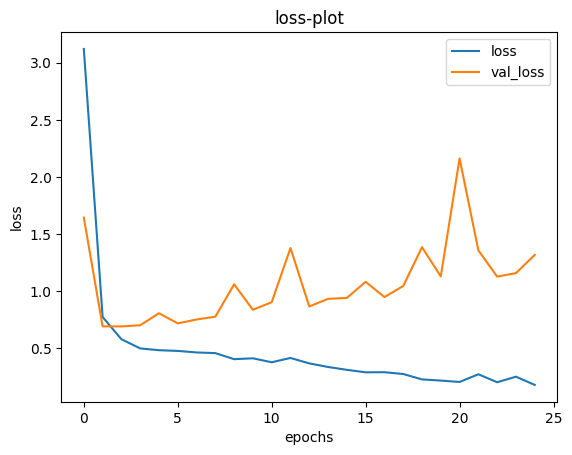

In [23]:

plt.plot(hist_final.history['loss'])
plt.plot(hist_final.history['val_loss'])
plt.title('loss-plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()


Testing the model

In [24]:
img_test = cv2.imread(os.path.join(img_path,'42845.jpg'))
sel_search_seg.setBaseImage(img_test)
sel_search_seg.switchToSelectiveSearchFast()
sel_search_seg_res = sel_search_seg.process()

img_out = img_test.copy()
boxes = []
c = 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

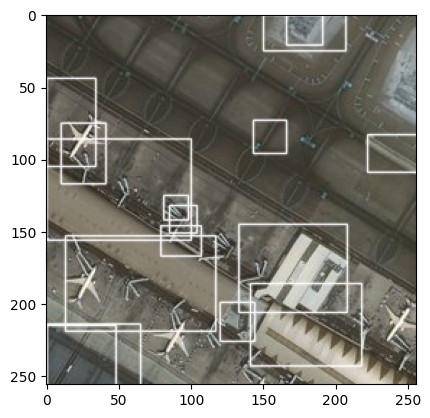

In [25]:
for e,res in enumerate(sel_search_seg_res):
    if e < 50:
        x,y,w,h = res
        temp_img = img_out[x:x+w,y:y+h]
        resize = cv2.resize(temp_img,(224,224),interpolation= cv2.INTER_AREA)
        resize = np.expand_dims(resize,axis=0)
        out = final_model.predict(resize)
        if (out[0][0]<out[0][1]):
            boxes.append([x,y,w,h])
            count = count+1
for box in boxes:
    x,y,w,h = box
    cv2.rectangle(img_out,(x,y),(x+w,y+h),(255,255,255),1,cv2.LINE_AA)

plt.imshow(img_out)

In [37]:

print(hist_final.history['accuracy'][-1])

0.9286279082298279


In [38]:
X_train = []
y_train = []

In [39]:
for e, name in enumerate(os.listdir(annotations_path)):
    if name.startswith('airplane'):
        file_name = name.split('.')[0] + '.jpg'
        img = cv2.imread(os.path.join(img_path, file_name))
        dataframe = pd.read_csv(os.path.join(annotations_path, name))
        gt_values = []

        for r in dataframe.iterrows():
            x1, y1, x2, y2 = map(int, r[1][0].split(' '))
            gt_values.append({'x1': x1, 'x2': x2, 'y1': y1, 'y2': y2})

        # Region Proposal using RPN (instead of Selective Search)
        for gval in gt_values:
            temp_img = img[gval['y1']:gval['y2'], gval['x1']:gval['x2']]
            resized = cv2.resize(temp_img, (224, 224), interpolation=cv2.INTER_AREA)
            X_train.append(resized)
            y_train.append(1)

            false_x1 = gval['x1'] - 10 if gval['x1'] > 10 else gval['x1']
            false_y1 = gval['y1'] - 10 if gval['y1'] > 10 else gval['y1']
            false_x2 = gval['x2'] + 10 if gval['x2'] + 10 < img.shape[1] else gval['x2']
            false_y2 = gval['y2'] + 10 if gval['y2'] + 10 < img.shape[0] else gval['y2']

            temp_img = img[false_y1:false_y2, false_x1:false_x2]
            resized = cv2.resize(temp_img, (224, 224), interpolation=cv2.INTER_AREA)
            X_train.append(resized)
            y_train.append(0)


<ipython-input-39-379c0442e1b9>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1, y1, x2, y2 = map(int, r[1][0].split(' '))
<ipython-input-39-379c0442e1b9>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1, y1, x2, y2 = map(int, r[1][0].split(' '))
<ipython-input-39-379c0442e1b9>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x1, y1, x2, y2 = map(int, r[1][0].split(' '))
<ipython-input-39-379c0442e1b9>:9: FutureWarning: Serie

In [40]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [44]:
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(vgg.input, x)

for layer in vgg.layers:
    layer.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [45]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the Model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, shuffle=True)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 303ms/step - accuracy: 0.8258 - loss: 1.2042 - val_accuracy: 0.9014 - val_loss: 0.4694
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.9711 - loss: 0.1509 - val_accuracy: 0.9272 - val_loss: 0.3389
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 147ms/step - accuracy: 0.9947 - loss: 0.0269 - val_accuracy: 0.9178 - val_loss: 0.5016
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.9962 - loss: 0.0270 - val_accuracy: 0.9249 - val_loss: 0.4063
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.9961 - loss: 0.0285 - val_accuracy: 0.9272 - val_loss: 0.4079
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - accuracy: 0.9996 - loss: 0.0130 - val_accuracy: 0.9202 - val_loss: 0.5098
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.9987 - loss: 0.0112 - val_accuracy: 0.9319 - val_loss: 0.3980
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - accuracy: 0.9996 - loss: 0

In [46]:
def test_model(image_path, model):
    img = cv2.imread(image_path)
    proposals = []

    # Generate Proposals Using RPN
    for _ in range(100):
        x1 = np.random.randint(0, img.shape[1] - 50)
        y1 = np.random.randint(0, img.shape[0] - 50)
        x2 = np.random.randint(x1 + 50, img.shape[1])
        y2 = np.random.randint(y1 + 50, img.shape[0])
        proposals.append((x1, y1, x2, y2))

    img_out = img.copy()

    for x1, y1, x2, y2 in proposals:
        temp_img = img[y1:y2, x1:x2]
        resized = cv2.resize(temp_img, (224, 224), interpolation=cv2.INTER_AREA)
        resized = np.expand_dims(resized, axis=0)
        prediction = model.predict(resized)

        if prediction > 0.5:
            cv2.rectangle(img_out, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

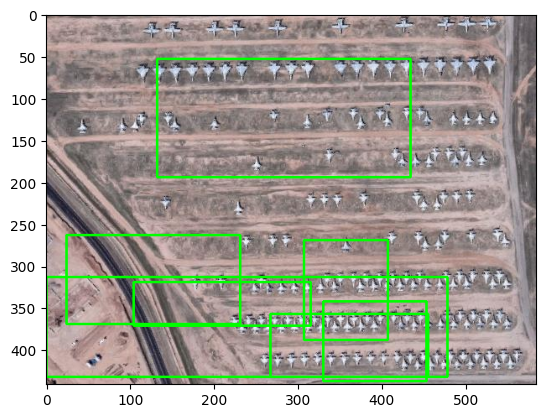

In [47]:
test_model('/content/gdrive/My Drive/airplanes/Images/Images/Planes8.jpg', model)

In [48]:

true_labels = []
predicted_labels = []

for e, res in enumerate(sel_search_seg_res):
    if e < 50:
        x, y, w, h = res
        temp_img = img_out[y:y + h, x:x + w]
        resize = cv2.resize(temp_img, (224, 224), interpolation=cv2.INTER_AREA)
        resize = np.expand_dims(resize, axis=0)

        out = final_model.predict(resize)
        predicted_class = np.argmax(out[0])
        predicted_labels.append(predicted_class)

        true_labels.append(1 if IOU({'x1': x, 'x2': x + w, 'y1': y, 'y2': y + h}, gt_values[0]) > 0.7 else 0)

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━